# TrueSkill のいろいろテスト

In [125]:
from trueskill import Rating, TrueSkill, rate_1vs1
import matplotlib.pyplot as plt
import random

In [178]:
# mu=1500, sigma=150, beta=75, tau=1.5
def diff_skill():
    alice = TrueSkill(draw_probability=0.0)
    bob = TrueSkill(draw_probability=0.0)
    for i in range(100):
        if random.random() < 0.24:
            bob, alice = rate_1vs1(bob, alice)
        else:
            alice, bob = rate_1vs1(alice, bob)
    return alice.mu - bob.mu - 3 * (alice.sigma - bob.sigma)
list_diff_skill = [diff_skill() for j in range(1000)]

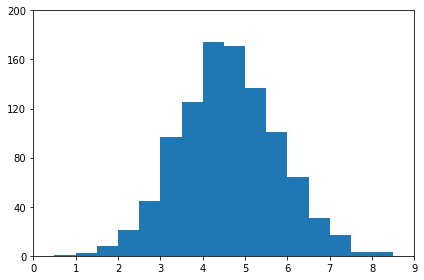

In [183]:
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)
ax.hist(list_diff_skill, bins=18, range=(0,9))
ax.set_xlim(0,9)
ax.set_yticks([0,40,80,120,160,200])

# save figure
plt.tight_layout()
plt.savefig('figure/hist_diff_skill.pdf', bbox_inches='tight')